In [1]:
import joblib
import pandas as pd
import numpy as np

In [2]:
X_train = joblib.load("../data/processed/X_train")
y_train = joblib.load("../data/processed/y_train")
X_val = joblib.load("../data/processed/X_val")
y_val = joblib.load("../data/processed/y_val")

In [3]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def get_score(model):
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred = model.predict(X_val)
  print("F1 score for training is %.4f" % f1_score(y_train, y_pred_train))
  print("MCC score for training is %.4f" % matthews_corrcoef(y_train, y_pred_train))
  print("F1 score is %.4f" % f1_score(y_val, y_pred))
  print("MCC score is %.4f" % matthews_corrcoef(y_val, y_pred))

#   # If it's random forest classifier, print out feature importances
#   if isinstance(model, RandomForestClassifier):
#     # check Important features
#     feature_importances_df = pd.DataFrame(
#         {"feature": df_features.columns, "importance": model.feature_importances_}
#     ).sort_values("importance", ascending=False)

#     # Display
#     print(feature_importances_df)

  print("=== Confusion Metrix For train set ===")
  print(confusion_matrix(y_train, y_pred_train))
  plot_confusion_matrix(model, X_train, y_train, cmap=plt.cm.Blues, normalize='true')

  print("=== Confusion Metrix For val set ===")
  print(confusion_matrix(y_val, y_pred))
  plot_confusion_matrix(model, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

F1 score for training is 0.9088
MCC score for training is 0.1071
F1 score is 0.9113
MCC score is 0.0552
=== Confusion Metrix For train set ===
[[  34 1040]
 [  24 5302]]
=== Confusion Metrix For val set ===
[[   5  252]
 [   8 1335]]


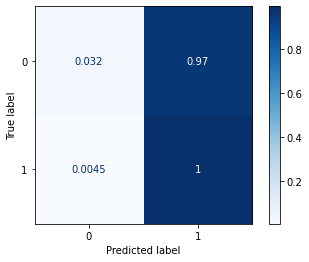

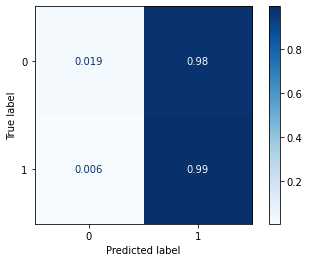

In [5]:
get_score(reg)

F1 score for training is 1.0000
MCC score for training is 1.0000
F1 score is 0.9109
MCC score is 0.1287
=== Confusion Metrix For train set ===
[[1074    0]
 [   0 5326]]
=== Confusion Metrix For val set ===
[[  17  240]
 [  19 1324]]


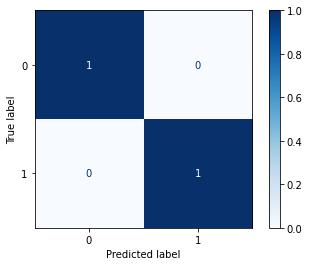

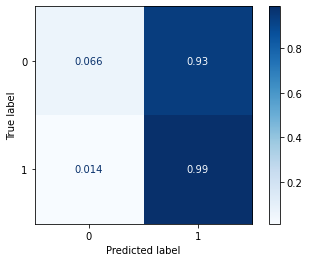

In [6]:
from sklearn.ensemble import RandomForestClassifier
get_score(RandomForestClassifier(random_state = 0))

F1 score for training is 0.9697
MCC score for training is 0.8058
F1 score is 0.9114
MCC score is 0.0887
=== Confusion Metrix For train set ===
[[ 741  333]
 [   0 5326]]
=== Confusion Metrix For val set ===
[[   9  248]
 [  11 1332]]


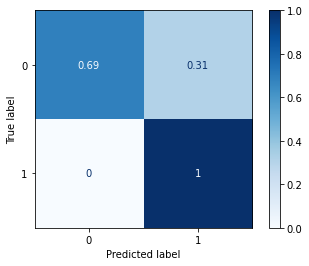

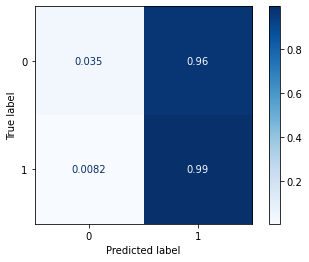

In [7]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy', max_depth=15))

In [52]:
from sklearn.metrics import roc_auc_score
max_roc_auc_score = 0.0
def get_roc_auc_score(model):
    global max_roc_auc_score
    model.fit(X_train, y_train)
    # If it's logistic regression, use predict_proba
    if isinstance(model, LogisticRegression):
        y_pred_train = model.predict_proba(X_train)[:,-1]
        y_pred = model.predict_proba(X_val)[:,-1]
    else:
        y_pred_train = model.predict(X_train)
        y_pred = model.predict(X_val)

    val_roc_auc_score = roc_auc_score(y_val, y_pred)
    print("roc_auc_score for training set: "+ str(roc_auc_score(y_train, y_pred_train)))
    print("roc_auc_score for testing set: "+ str(val_roc_auc_score))

    if max_roc_auc_score < val_roc_auc_score:
        print("The score is better than "+ str(max_roc_auc_score) + " so save the model")
        joblib.dump(model, "../models/kpw_best_model")
        max_roc_auc_score = val_roc_auc_score

In [48]:
from sklearn.linear_model import Lasso
get_roc_auc_score(Lasso(alpha=0.1))


roc_auc_score for training set: 0.5
roc_auc_score for testing set: 0.5
The score is better than 0.0 so save the model


In [49]:
from sklearn.linear_model import LogisticRegression
get_roc_auc_score(LogisticRegression())

roc_auc_score for training set: 0.7047104223614732
roc_auc_score for testing set: 0.7069108882778841
The score is better than 0.5 so save the model


In [50]:
get_roc_auc_score(LogisticRegression(l1_ratio=0.5))

roc_auc_score for training set: 0.7047104223614732
roc_auc_score for testing set: 0.7069108882778841


In [51]:
from sklearn.ensemble import RandomForestRegressor
get_roc_auc_score(RandomForestRegressor())

roc_auc_score for training set: 1.0
roc_auc_score for testing set: 0.6432068862613753


In [43]:
get_roc_auc_score(RandomForestRegressor(n_estimators = 150, random_state = 8, max_depth = 8, min_samples_leaf = 2))

roc_auc_score for training set: 0.8966321359467031
roc_auc_score for testing set: 0.6832458836856912


In [44]:
get_roc_auc_score(RandomForestRegressor(n_estimators = 100, random_state = 8, max_depth = 5, min_samples_leaf = 5))

roc_auc_score for training set: 0.7669847716587962
roc_auc_score for testing set: 0.6953130658755153


In [45]:
get_roc_auc_score(RandomForestRegressor(n_estimators = 100, random_state = 8, max_depth = 5, min_samples_leaf = 3))

roc_auc_score for training set: 0.7668797040064166
roc_auc_score for testing set: 0.6935862854229018


In [46]:
get_roc_auc_score(RandomForestRegressor(n_estimators = 100, random_state = 8, max_depth = 5, criterion = 'mae'))

roc_auc_score for training set: 0.5552084185587586
roc_auc_score for testing set: 0.5463507276525346
